In [15]:
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
file_path = "/content/train (1).csv"
df = pd.read_csv(file_path)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [19]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns=['Cabin'])

df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


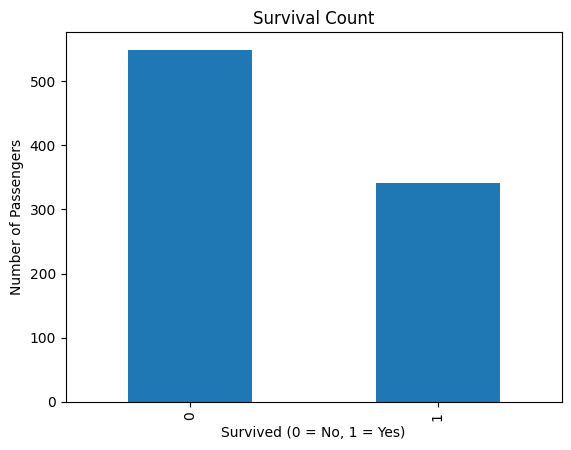

In [20]:
plt.figure()
df['Survived'].value_counts().plot(kind='bar')
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()


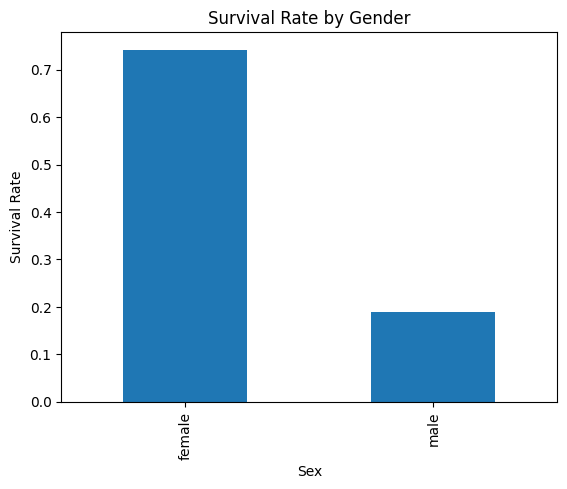

In [21]:
plt.figure()
df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()


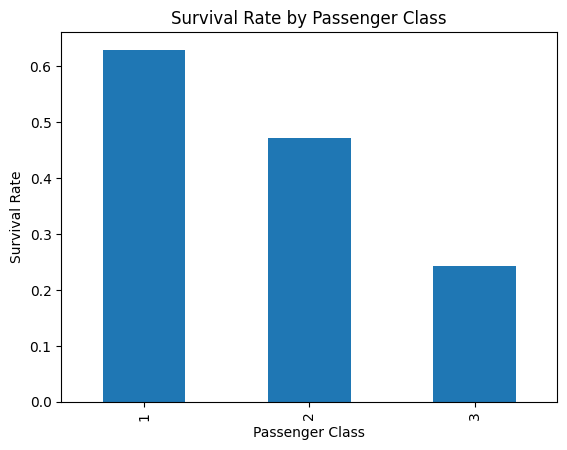

In [22]:
plt.figure()
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()


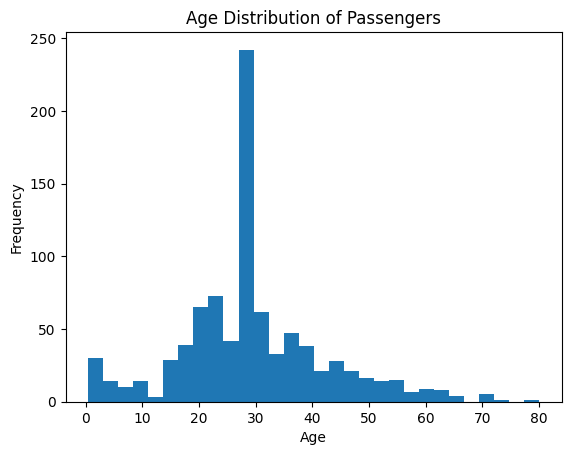

In [23]:
plt.figure()
df['Age'].plot(kind='hist', bins=30)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


<Figure size 640x480 with 0 Axes>

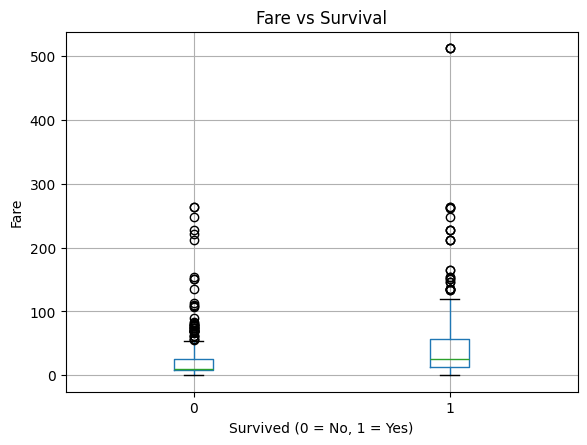

In [24]:
plt.figure()
df.boxplot(column='Fare', by='Survived')
plt.title("Fare vs Survival")
plt.suptitle("")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.show()


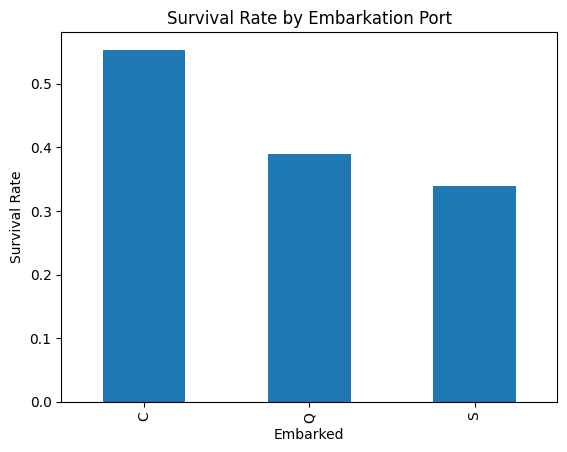

In [25]:
plt.figure()
df.groupby('Embarked')['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Embarkation Port")
plt.ylabel("Survival Rate")
plt.show()


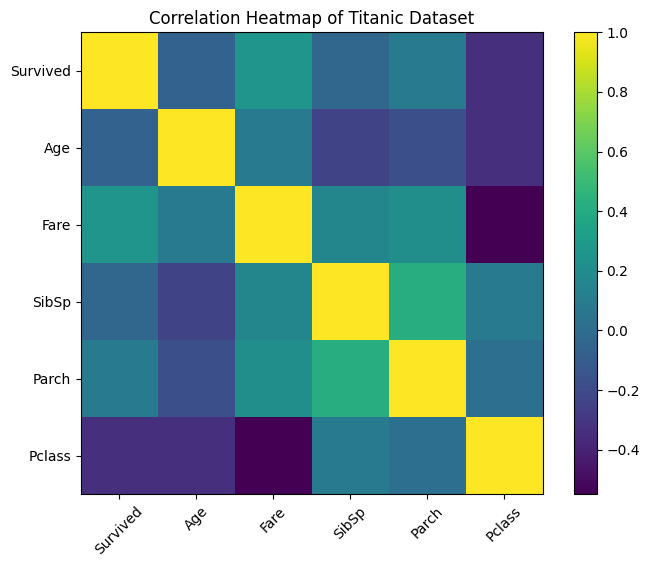

In [27]:
# Select numerical columns
corr_data = df[['Survived', 'Age', 'Fare', 'SibSp', 'Parch', 'Pclass']]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix)
plt.colorbar()

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()


In [28]:
df[['Survived','Age','Fare','SibSp','Parch','Pclass']].corr()


,Survived,Age,Fare,SibSp,Parch,Pclass
Survived,1.000000,-0.064910,0.257307,-0.035322,0.081629,-0.338481
Age,-0.064910,1.000000,0.096688,-0.233296,-0.172482,-0.339898
Fare,0.257307,0.096688,1.000000,0.159651,0.216225,-0.549500
SibSp,-0.035322,-0.233296,0.159651,1.000000,0.414838,0.083081
Parch,0.081629,-0.172482,0.216225,0.414838,1.000000,0.018443
Pclass,-0.338481,-0.339898,-0.549500,0.083081,0.018443,1.000000


Summary:
The Titanic dataset was cleaned by handling missing values in Age and Embarked and removing the Cabin column.
Exploratory data analysis showed that survival was strongly influenced by gender, passenger class, and fare.
Females, first-class passengers, and those who paid higher fares had significantly higher survival rates.
Overall, the analysis reveals clear social and economic patterns affecting passenger survival.